In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"/content/train.csv")

In [4]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


> # Data Prepprocessing

In [9]:
df = df.dropna(axis = 0)

> ## Encoding the non-meumeric Columns of Data

In [15]:
from  sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Stage_fear"] = LE.fit_transform(df["Stage_fear"])

/tmp/ipython-input-2370860272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Stage_fear"] = LE.fit_transform(df["Stage_fear"])


In [17]:
df["Drained_after_socializing"] = LE.fit_transform(df["Drained_after_socializing"])

/tmp/ipython-input-4131066276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Drained_after_socializing"] = LE.fit_transform(df["Drained_after_socializing"])


> ## Spliting Data into two variables

In [30]:
x = df.iloc[:, :-1]
x=x.drop("id",axis=1)
y = df["Personality"]

In [31]:
y = LE.fit_transform(y)

> ## Splitting Data Into training and testing sets:

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

> # Model Training

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay

In [36]:
XGB = XGBClassifier()
XGB = XGB.fit(x_train, y_train)
XGB_pred = XGB.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test, XGB_pred)
classfication = classification_report(y_test, XGB_pred)
print(accuracy)
print(classfication)

0.9543670264965652
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1700
           1       0.87      0.86      0.86       338

    accuracy                           0.95      2038
   macro avg       0.92      0.91      0.92      2038
weighted avg       0.95      0.95      0.95      2038



<function matplotlib.pyplot.show(close=None, block=None)>

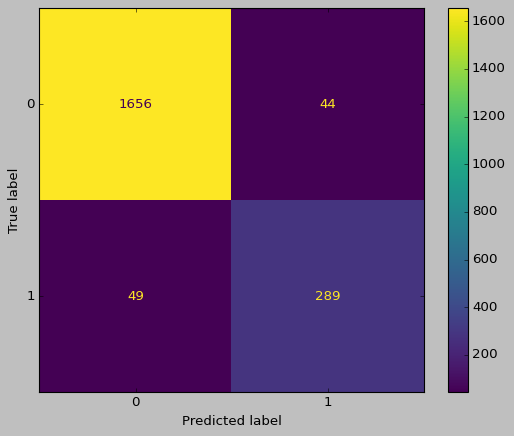

In [42]:
import matplotlib.style as style
style.use("classic")
cm = confusion_matrix(y_test,XGB_pred,labels = XGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = XGB.classes_)
disp.plot()
plt.show

> # Predicting the Labels for test data

In [82]:
df_test = pd.read_csv(r"/content/test.csv")

In [83]:
df_test.tail()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0
6174,24698,NaN,Yes,1.0,1.0,Yes,1.0,0.0


> ## Preprocessing

In [85]:
original_ids = df_test["id"]
original_ids


,id
0,18524
1,18525
2,18526
3,18527
4,18528
...,...
6170,24694
6171,24695
6172,24696
6173,24697


In [86]:
df_test["Drained_after_socializing"] = LE.fit_transform(df_test["Drained_after_socializing"])
df_test["Stage_fear"] = LE.fit_transform(df_test["Stage_fear"])


In [88]:
df_test = df_test.drop("id",axis=1)
predictions = XGB.predict(df_test)
submission_df = pd.DataFrame({"id": original_ids,"Personality":predictions})
labels = {0:"Extrovert",1:"Introvert"}
submission_df["Personality"] = submission_df["Personality"].map(labels)

In [89]:
submission_df

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [91]:
submission_df.to_csv("Submission.csv")